<a href="https://colab.research.google.com/github/ghubnerr/nlp-stuff/blob/main/GPT_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Byte-level Encoding: Input Representation (Paper)
Tokenizer: 50,257 possible Tokens
Context Size: 1024 tokens

Attention layer: sees up to 1024 tokens.

### Motivation for Tokenization
- Heart of much weirdness in LLMs i.e.: Spelling, string processing, non-english languages, simple arithmetic, coding in Python (GPT-2), abrutply halting when seeing <|endoftext|>, trailing whitespace, YAML over JSON.

### Tiktokenizer
- https://tiktokenizer.vercel.app

Shown explicitly in colors.
Main examples (GPT-2):

▶ token-ization (2 tokens)

▶ ' at' (includes whitespace)

▶ \[127\]\[ +\]\[ 6\]\[77\]

▶ 'Egg' '.' -- whereas -- 'I'' have'' an'' Egg''.'

*For the same concepts, all of these have different id's*

▶ whitespaces in code -- individually!

<br/>
<hr/>


What we're looking for is the sweet spot of vocabulary size.

In [ ]:
# Strings are immutable sequences of Unicode Code Points
# Defined by the Unicode Consortium (149,813 characters)

"안녕하세요 👋"

ord("h") # -> Gives me the unicode code point #104
ord("👋") # 50504

128075

In [ ]:
[ord(x) for x in "안녕하세요 👋"]

[50504, 45397, 54616, 49464, 50836, 32, 128075]

Why not just use these numbers?

▶ Unstable representation

▶ Long vocabulary


<hr>
Encodings: UTF-8, UTF-16, UTF-32 are ways of translating unicode encodings into binary data (byte-strings)

### UTF-8 Encoding: Preferred
Backwards-compatible to the ASCII Text

In [ ]:
list("안녕하세요 👋".encode("utf-8"))
# list("안녕하세요 👋".encode("utf-16")) # Wasteful encoding

[236,
 149,
 136,
 235,
 133,
 149,
 237,
 149,
 152,
 236,
 132,
 184,
 236,
 154,
 148,
 32,
 240,
 159,
 145,
 139]

This vocabulary implies that the vocabulary length would only be of 256 characters, and all of our text would be stretched out to very long sequences of bytes. What this does is make the embedding table to be tiny, but the sequences are very long. This is bad because of the finite context length that we can support inside the attention head.

### 💡 Predicting Million-byte Sequences with Multiscale Transformers


# Byte-pair Encoding

Instead of bytes, we iteratively find the pair of tokens that occur the most frequently in a sequence. Once we identify that pair, we replace the pair with a single new token.

i.e.: aaabdaaabac ▶ ZabdZabac (Z=aa)
      ▶ ZYdZYac (Y=ab) ▶ XdXac (ZY = X)

<br>

*here, instead of a sequence of 11 tokens with vocabulary length of 4, we know have 5 tokens but the vocabulary length is 7*

### This optimizes for a compressed training dataset

In [ ]:
text = "Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception."
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens))

print("---")
print(text)
print("length:", len(text))
print("---")
print(tokens)
print("length:", len(tokens))
# A lot of the unicode becomes multiple characters

---
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
length: 533
---
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140

In [ ]:
# Finding the pair of bytes that work most frequently

def get_stats(ids):
  counts = {}
  for pair in zip(ids, ids[1:]):
    counts[pair] = counts.get(pair, 0) + 1
  return counts

stats = get_stats(tokens)
# print(stats)
print(sorted(((v,k) for k,v in stats.items()), reverse=True))

# First pair (most common) is the first item printed

[(20, (101, 32)), (15, (240, 159)), (12, (226, 128)), (12, (105, 110)), (10, (115, 32)), (10, (97, 110)), (10, (32, 97)), (9, (32, 116)), (8, (116, 104)), (7, (159, 135)), (7, (159, 133)), (7, (97, 114)), (6, (239, 189)), (6, (140, 240)), (6, (128, 140)), (6, (116, 32)), (6, (114, 32)), (6, (111, 114)), (6, (110, 103)), (6, (110, 100)), (6, (109, 101)), (6, (104, 101)), (6, (101, 114)), (6, (32, 105)), (5, (117, 115)), (5, (115, 116)), (5, (110, 32)), (5, (100, 101)), (5, (44, 32)), (5, (32, 115)), (4, (116, 105)), (4, (116, 101)), (4, (115, 44)), (4, (114, 105)), (4, (111, 117)), (4, (111, 100)), (4, (110, 116)), (4, (110, 105)), (4, (105, 99)), (4, (104, 97)), (4, (103, 32)), (4, (101, 97)), (4, (100, 32)), (4, (99, 111)), (4, (97, 109)), (4, (85, 110)), (4, (32, 119)), (4, (32, 111)), (4, (32, 102)), (4, (32, 85)), (3, (118, 101)), (3, (116, 115)), (3, (116, 114)), (3, (116, 111)), (3, (114, 116)), (3, (114, 115)), (3, (114, 101)), (3, (111, 102)), (3, (111, 32)), (3, (108, 108)), (

In [ ]:
chr(101), chr(32)

('e', ' ')

 Minting a new token every time we see the most-common pair and swap it out

In [ ]:
top_pair = max(stats, key=stats.get) # Ranking by value and getting max key

In [ ]:
def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    # if we're not in the last position and the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids

tokens2 = merge(tokens, top_pair, 256)
print(tokens2)
print("length: ", len(tokens2)) # Decreased by 20


[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128, 140, 240, 159, 135, 174, 226, 128, 140, 240, 159, 135, 168, 226, 128, 140, 240, 159, 135, 180, 226, 128, 140, 240, 159, 135, 169, 226, 128, 140, 240, 159, 135, 170, 33, 32, 240, 159, 152, 132, 32, 84, 104, 256, 118, 101, 114, 121, 32, 110, 97, 109, 256, 115, 116, 114, 105, 107, 101, 115, 32, 102, 101, 97, 114, 32, 97, 110, 100, 32, 97, 119, 256, 105, 110, 116, 111, 32, 116, 104, 256, 104, 101, 97, 114, 116, 115, 32, 111, 102, 32, 112, 114, 111, 103, 114, 97, 109, 109, 101, 114, 115, 32, 119, 111, 114, 108, 100, 119, 105, 100, 101, 46, 32, 87, 256, 97, 108, 108, 32, 107, 110, 111, 119, 32, 119, 256, 111, 117, 103, 104, 116, 32, 116, 111, 32, 226, 128, 156

### The more steps we take, the larger the vocabulary and the shorter the sequence: Finding the sweet spot hyperparameter. GPT-4 is 100,000

In [ ]:
def get_stats(ids):
  counts = {}
  for pair in zip(ids, ids[1:]):
    counts[pair] = counts.get(pair, 0) + 1
  return counts


def merge(ids, pair, idx):
  newids = []
  i = 0
  while i < len(ids):
    # if we're not in the last position and the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      newids.append(idx)
      i += 2
    else:
      newids.append(ids[i])
      i += 1
  return newids


# ---
vocab_size = 276 # desired final vocab size
num_merges = vocab_size - 256
ids = list(tokens) # copy

merges = {} # (int, int) -> int

for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx = 256 + i
  print(f"merging {pair} into a new token {idx}")
  ids = merge(ids, pair, idx)
  merges[pair] = idx

merging (101, 32) into a new token 256
merging (240, 159) into a new token 257
merging (226, 128) into a new token 258
merging (105, 110) into a new token 259
merging (115, 32) into a new token 260
merging (97, 110) into a new token 261
merging (116, 104) into a new token 262
merging (257, 133) into a new token 263
merging (257, 135) into a new token 264
merging (97, 114) into a new token 265
merging (239, 189) into a new token 266
merging (258, 140) into a new token 267
merging (267, 264) into a new token 268
merging (101, 114) into a new token 269
merging (111, 114) into a new token 270
merging (116, 32) into a new token 271
merging (259, 103) into a new token 272
merging (115, 116) into a new token 273
merging (261, 100) into a new token 274
merging (32, 262) into a new token 275


Note that the token 256 is also eligible for merging (just like ZY becomes X). The format of this is more of a binary forest instead of a particular tree

In [ ]:
print("tokens length:", len(tokens))
print("ids length:", len(ids))
print(f"compression ration: {len(tokens) / len(ids):.2f}X")

tokens length: 616
ids length: 451
compression ration: 1.37X


The Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from the LLM), on which you train the vocabulary using the BPE algorithm. It then translates back and forth between raw text and sequence of tokens.

**The LLM later only ever sees the tokens and never directly deals with any text.**

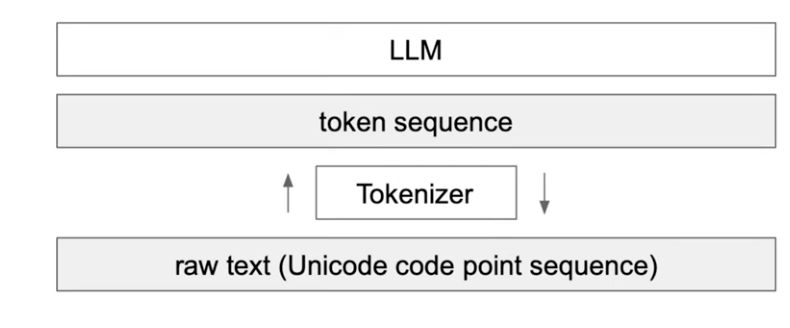

## Decoding
Given a sequence of integers in the range [0, vocab_size], what is the text?

In [ ]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
  vocab[idx] = vocab[p0] + vocab[p1]

def decode(ids):
  # given ids (list of integers), return Python string
  tokens = b"".join(vocab[idx] for idx in ids)
  text = tokens.decode("utf-8", errors="replace")
  return text

## Encoding
The up arrow in the image above. Remember that merges was built from top to bottom (some merges on the way down rely on other merges)

In [ ]:
def encode(text):
  tokens = list(text.encode("utf-8"))
  while len(tokens) >= 2:
    stats = get_stats(tokens) # Counting occurrence of pairs as dict

    # For any pair, looking into merges and get pair with min number
    pair = min(stats, key=lambda p: merges.get(p, float("inf")))
    if pair not in merges:
      break # nothing else can be merged
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)

  return tokens

### Not all token sequences are valid byte strings

In [ ]:
text2 = decode(encode(text)) # testing with the training data
print(text2 == text)

True


# Tokenization in GPT series
### GPT-2 paper (2019)
Motivating the use of BPE on the Byte-level representation of UTF-8 encoding + Vocabulary sizes.

▶ Common words i.e.: Dog ("dog.", "dog?", "dog!") -- unnecessary clustering

▶ Top-down enforcing some black-lists for pair-encoding.


### Using a Regex pattern
GPT-2 Regex:
```python
re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")
```

In [ ]:
!pip install regex

### Forced splits using regex patterns

Re.findall will take the pattern and will try to match it against the input string and organize the occurrences into a list. We're taking the string and instead of directly encoding, we first split it up.

1. Splits the text into a list of texts
2. All the elements of the list are processed individually
3. The results are concatenated

Only find merges within elements of lists. The results of that will be joint.

In [ ]:
import regex as re
gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

# hardcoded to the apostrophe '   | case sensitive
print(re.findall(gpt2pat, "Hello've world123 HOW's she'll  how's be there!!!?     "))

['Hello', "'ve", ' world', '123', ' HOW', "'s", ' she', "'ll", ' ', ' how', "'s", ' be', ' there', '!!!?', '     ']


In [ ]:
example = """
for i in range(1, 101):
    if i % 3 == 0 and i % 5 ==0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)
"""

# note that openAI probabaly enforced some sort of enforcement for whitespace
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', '0', ':', '\n       ', ' print', '("', 'FizzBuzz', '")', '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Fizz', '")', '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', '("', 'Buzz', '")', '\n   ', ' else', ':', '\n       ', ' print', '(', 'i', ')', '\n']


In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:00


### See [tikotken](https://tiktokenizer.vercel.app/)for details

Encoding for GPT-2 on OpenAI Github:

https://github.com/openai/tiktoken/blob/main/tiktoken_ext/openai_public.py


In [ ]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding("gpt2")
print(enc.encode("    hello world!"))

# GPT-4 (merge spaces)
enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("    hello world!!!"))

[220, 220, 220, 23748, 995, 0]
[262, 24748, 1917, 12340]


```python
r"""'(?:[sdmt]|ll|ve|re)| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""",
```
GPT-4 CL100K-base
```python
r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+""",

```
▶ Number changes
▶ White-space handling
▶ Case-insensitive

(150k -> 100k vocab size)

In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe

--2024-02-26 23:33:28--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.179.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.179.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe’

vocab.bpe           100%[===================>] 445.62K  2.07MB/s    in 0.2s    

2024-02-26 23:33:29 (2.07 MB/s) - ‘vocab.bpe’ saved [456318/456318]



In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2024-02-26 23:33:29--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 20.60.179.33
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|20.60.179.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘encoder.json’

encoder.json        100%[===================>]   1018K  3.07MB/s    in 0.3s    

2024-02-26 23:33:29 (3.07 MB/s) - ‘encoder.json’ saved [1042301/1042301]



In [ ]:
import os, json

# -> saving and loading variables for merges and vocab
with open('encoder.json', 'r') as f:
  encoder = json.load(f)

  # encoder equal to vocab object encoder

with open('vocab.bpe', 'r', encoding='utf-8') as f:
  bpe_data = f.read()

  # this is our merges

bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]

GPT also has byte-encoder and byte-decoder.

## Special Tokens

In [ ]:
# 256 raw byte tokens. 50,000 merges. + 1 special token
len(encoder)

50257

In [ ]:
encoder['<|endoftext|>']

50256

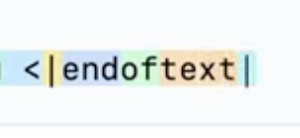 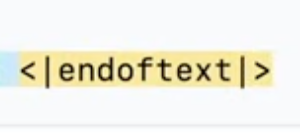

## Special token decoding in Rust for the tiktoken library

You can add these special tokens to the vocabulary through the tiktoken library

```rust
fn _encode_native(&self, text: &str, allowed_special: &HashSet<&str>) -> (Vec<Rank>, usize) {
        let special_regex = self._get_tl_special_regex();
        let regex = self._get_tl_regex();
        let mut ret = vec![];
        let mut start = 0;
        let mut last_piece_token_len = 0;
        loop {
            let mut next_special;
            let mut start_find = start;
            loop {
                // Find the next allowed special token, if any
                next_special = special_regex.find_from_pos(text, start_find).unwrap();
                match next_special {
                    Some(m) => {
                        if allowed_special.contains(&text[m.start()..m.end()]) {
                            break;
                        }
                        start_find = m.start() + 1;
                    }
                    None => break,
                }
            }
```
```rust
            let end = next_special.map_or(text.len(), |m| m.start());

            // Okay, here we go, compare this logic to _encode_ordinary_native
            for mat in regex.find_iter(&text[start..end]) {
                let piece = mat.unwrap().as_str().as_bytes();
                if let Some(token) = self.encoder.get(piece) {
                    last_piece_token_len = 1;
                    ret.push(*token);
                    continue;
                }
                let tokens = byte_pair_encode(piece, &self.encoder);
                last_piece_token_len = tokens.len();
                ret.extend(&tokens);
            }
```
```rust

        match next_special {
                // And here we push the special token
                Some(m) => {
                    let piece = m.as_str();
                    let token = self.special_tokens_encoder[piece];
                    ret.push(token);
                    start = m.end();
                    last_piece_token_len = 0;
                }
                None => break,
            }
        }

        // last_piece_token_len is how many tokens came from the last regex split. This is used
        // for determining unstable tokens, since you can't merge across (stable) regex splits
        (ret, last_piece_token_len)
    }
    


You can extend it by adding special tokens

**Tiktoken Extension**
```python
cl100k_base = tiktoken.get_encoding("cl100k_base")

example_enc = tiktoken.Encoding(
    name="cl100k_im",
    pat_str=cl100k_base.pat_str,
    mergeable_ranks=cl100k_base._mergeable_ranks,
    special_tokens={
        **cl100k_base._special_tokens,
        "<|im_start|>": 100264,
        "<|im_end|>": 100265
    }
)
```

**GPT2**
```python
def gpt2():
  mergeable_ranks = ...

  return {
    "name": "gpt2",
    "explicit_n_vocab": 50257,
    "pat_str" : r"""REGEX""",
    "mergeable_ranks": mergeable_ranks,
    "special_tokens": {ENDOFTEXT: 50256},
  }
```


When you add special tokens, you need to do some model surgery to the parameters in the model because you're basically adding in an integer and you have to make sure that your embedding matrix can fit in that new vector for the token. In addition to that, the projection on the final layer of the transformer is extended by 1 to accommodate for the token. People like to fine tune the model to take in the tokens.

# MINBPE

In [ ]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")
print(enc.encode("안녕하세요 👋"))
print(enc.decode(enc.encode("안녕하세요 👋")))
print(enc.decode(enc.encode("안녕하세요 👋")) == "안녕하세요 👋")

[31495, 230, 75265, 243, 92245, 62904, 233]
안녕하세요 👋
True


## Exercise prompt



Build your own GPT-4 Tokenizer!

### Step 1

Write the `BasicTokenizer` class, with the following three core functions:

- `def train(self, text, vocab_size, verbose=False)`
- `def encode(self, text)`
- `def decode(self, ids)`

Train your tokenizer on whatever text you like and visualize the merged tokens. Do they look reasonable? One default test you may wish to use is the text file `tests/taylorswift.txt`.

### Step 2

Convert you `BasicTokenizer` into a `RegexTokenizer`, which takes a regex pattern and splits the text exactly as GPT-4 would. Process the parts separately as before, then concatenate the results. Retrain your tokenizer and compare the results before and after. You should see that you will now have no tokens that go across categories (numbers, letters, punctuation, more than one whitespace). Use the GPT-4 pattern:

```
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
```


### Step 3

You're now ready to load the merges from the GPT-4 tokenizer and show that your tokenizer produces the identical results for both `encode` and `decode`, matching [tiktoken](https://github.com/openai/tiktoken).

```
# match this
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the GPT-4 tokenizer
ids = enc.encode("hello world!!!? (안녕하세요!) lol123 😉")
text = enc.decode(ids) # get the same text back
```

Unfortunately, you will run into two issues:

1. It is not trivial to recover the raw merges from the GPT-4 tokenizer. You can easily recover what we call `vocab` here, and what they call and store under `enc._mergeable_ranks`. Feel free to copy paste the `recover_merges` function in `minbpe/gpt4.py`, which takes these ranks and returns the raw merges. If you wish to know how this function works, read [this](https://github.com/openai/tiktoken/issues/60) and [this](https://github.com/karpathy/minbpe/issues/11#issuecomment-1950805306). Basically, under some conditions it is enough to only store the parent nodes (and their rank) and get rid of the precise details of which children merged up to any parent.
2. Second, the GPT-4 tokenizer for some reason permutes its raw bytes. It stores this permutation in the first 256 elements of the mergeable ranks, so you can recover this byte shuffle relatively simply as `byte_shuffle = {i: enc._mergeable_ranks[bytes([i])] for i in range(256)}`. In both your encode and decode, you'll have to shuffle bytes around accordingly. If you're stuck, reference the minbpe/gpt4.py` file for hints.

### Step 4

(Optional, irritating, not obviously useful) Add the ability to handle special tokens. You'll then be able to match the output of tiktoken even when special tokens are present, e.g.:

```
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the GPT-4 tokenizer
ids = enc.encode("<|endoftext|>hello world", allowed_special="all")
```

Without `allowed_special` tiktoken will error.

### Step 5

If you've made it this far, you're now a pro at LLM Tokenization! Sadly, you're not exactly done yet because a lot of LLMs outside of OpenAI (e.g. Llama, Mistral) use [sentencepiece](https://github.com/google/sentencepiece) instead. Primary difference being that sentencepiece runs BPE directly on Unicode code points instead of on UTF-8 encoded bytes. Feel free to explore sentencepiece on your own (good luck, it's not too pretty), and stretch goal if you really experience and suffer from the burden of time, re-write your BPE to be on Unicode code points and match the Llama 2 tokenizer.

# SentencePiece
Can efficiently both train and inference BPE tokenizers. It's used both by Llama and Mistral

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

In [ ]:
import sentencepiece as spm

In [ ]:
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("Sentencepiece is an unsupervised text tokenizer and detokenizer")

### SentencePiece GitHub by Google
 https://github.com/google/sentencepiece

In [ ]:
import os

options = dict(
    #input spec
    input="toy.txt",
    input_format="text",
    #output spec
    model_prefix="tok378",
    #algorithm spec
    #BPE alg
    model_type="bpe",
    vocab_size=378,
    #normalization
    normalization_rule_name="identity", # turn off
    remove_extra_whitespaces=False,
    input_sentence_size=200000000, #max number of training sentences
    max_sentence_length=4192, # max number of bytes per sentence
    seed_sentencepiece_size=1000000,
    shuffle_input_sentence=True,
    # rare word treatment
    character_coverage=0.99995,
    byte_fallback=True, # if False, korean is just <unk>
    # merge rules
    split_digits=True,
    split_by_unicode_script=True,
    split_by_whitespace=True,
    split_by_number=True,
    max_sentencepiece_length=16,
    add_dummy_prefix=True, # `world` in "<bos>world" is equal to "hello world"
    allow_whitespace_only_pieces=True,
    # special tokens
    unk_id=0,
    bos_id=1,
    eos_id=2,
    pad_id=-1,
    # systems
    num_threads=os.cpu_count(),
)

spm.SentencePieceTrainer.train(**options)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.load('tok378.model')

True

In [ ]:
vocab = [[sp.id_to_piece(idx), idx] for idx in range(sp.get_piece_size())]
vocab

[['<unk>', 0],
 ['<s>', 1],
 ['</s>', 2],
 ['<0x00>', 3],
 ['<0x01>', 4],
 ['<0x02>', 5],
 ['<0x03>', 6],
 ['<0x04>', 7],
 ['<0x05>', 8],
 ['<0x06>', 9],
 ['<0x07>', 10],
 ['<0x08>', 11],
 ['<0x09>', 12],
 ['<0x0A>', 13],
 ['<0x0B>', 14],
 ['<0x0C>', 15],
 ['<0x0D>', 16],
 ['<0x0E>', 17],
 ['<0x0F>', 18],
 ['<0x10>', 19],
 ['<0x11>', 20],
 ['<0x12>', 21],
 ['<0x13>', 22],
 ['<0x14>', 23],
 ['<0x15>', 24],
 ['<0x16>', 25],
 ['<0x17>', 26],
 ['<0x18>', 27],
 ['<0x19>', 28],
 ['<0x1A>', 29],
 ['<0x1B>', 30],
 ['<0x1C>', 31],
 ['<0x1D>', 32],
 ['<0x1E>', 33],
 ['<0x1F>', 34],
 ['<0x20>', 35],
 ['<0x21>', 36],
 ['<0x22>', 37],
 ['<0x23>', 38],
 ['<0x24>', 39],
 ['<0x25>', 40],
 ['<0x26>', 41],
 ['<0x27>', 42],
 ['<0x28>', 43],
 ['<0x29>', 44],
 ['<0x2A>', 45],
 ['<0x2B>', 46],
 ['<0x2C>', 47],
 ['<0x2D>', 48],
 ['<0x2E>', 49],
 ['<0x2F>', 50],
 ['<0x30>', 51],
 ['<0x31>', 52],
 ['<0x32>', 53],
 ['<0x33>', 54],
 ['<0x34>', 55],
 ['<0x35>', 56],
 ['<0x36>', 57],
 ['<0x37>', 58],
 ['<0x38>', 5

Byte fall-back is used in the korean characters because even though it was not in our training set, it was still encoded based on their encoding

In [ ]:
ids = sp.encode("안녕하세요 👋")
print(ids)

[361, 239, 152, 139, 238, 136, 152, 240, 152, 155, 239, 135, 187, 239, 157, 151, 361, 243, 162, 148, 142]


In [ ]:
print([sp.id_to_piece(idx) for idx in ids])

['▁', '<0xEC>', '<0x95>', '<0x88>', '<0xEB>', '<0x85>', '<0x95>', '<0xED>', '<0x95>', '<0x98>', '<0xEC>', '<0x84>', '<0xB8>', '<0xEC>', '<0x9A>', '<0x94>', '▁', '<0xF0>', '<0x9F>', '<0x91>', '<0x8B>']


# More configs

## Setting up vocab size
The only place that the vocab size is important is in the embedding table and in the linear layer (for the logits prediction softmax) in the last layer.

Every single token is an additional dot-product we have to do in the linear layer.

Why vocab size can't be infinite
- Space
- Computationally expensive
- Undertraining some parameters
- Tokens will appear in fewer and fewer examples -> Vectors undertrained.
- Shrinking sequences a lot, but too large of chunks make it not have enough time to think per some characters of text. Too much information in one piece.


SOTA today: ~10k

### Extending the Vocab Size for Special Tokens
For this, we have to:
1. Resize the embeddings (add rows)
2. Initialize parameters from scratch
3. Extend the weight inside the linear layer (making dot products with the associated parameters)


*it's common to freeze the base model and only add the special tokens*


**Learning to compress prompts with Gist Tokens**
https://arxiv.org/pdf/2304.08467.pdf

Long prompts are slow to process -- Here, you introduce new tokens, put them in a sequence and train the model by distillation. You're only training the representations of the new tokens and optimizing over the new tokens such that the behavior of the language model is identical to the model that has a very large prompt. Then you can discard the long prompt.

## Multimodal [image, video, audio]
How do you feed in these modalities and predict them from a transformer

You just tokenize the input domains and call it a day!

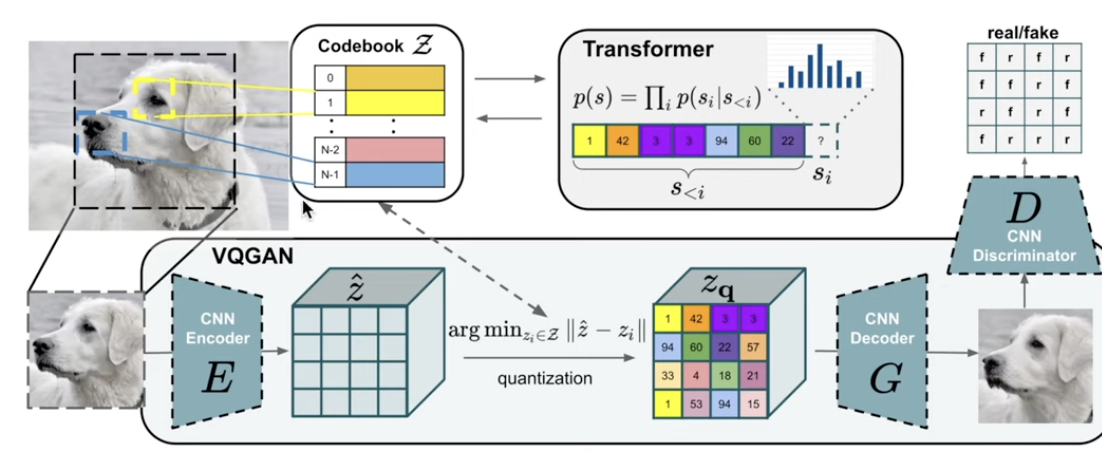

### Sora

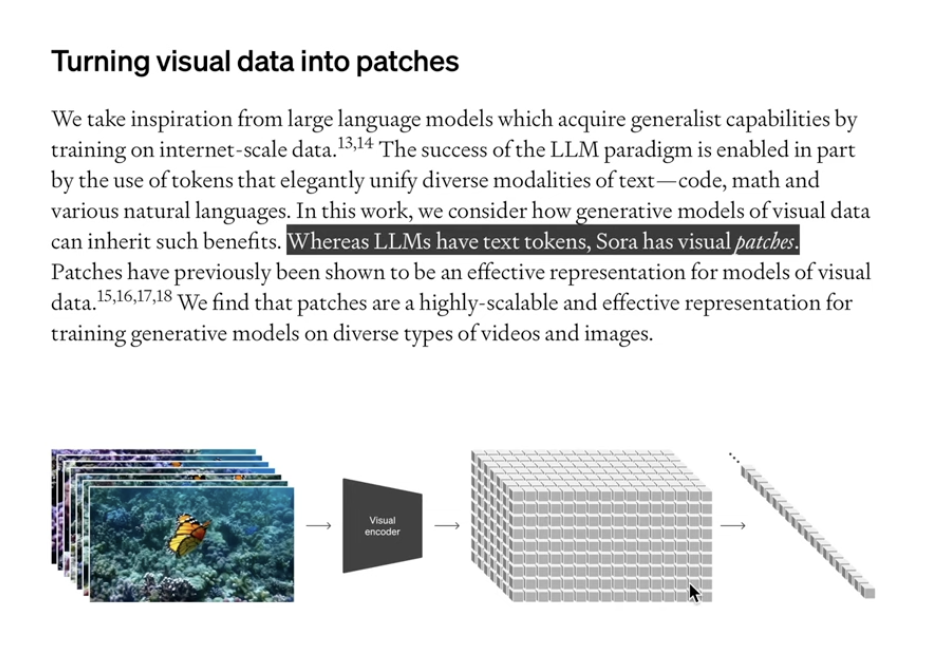

## Integer tokenization
https://www.beren.io/2023-02-04-Integer-tokenization-is-insane/